In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
df[45:51]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor


In [15]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

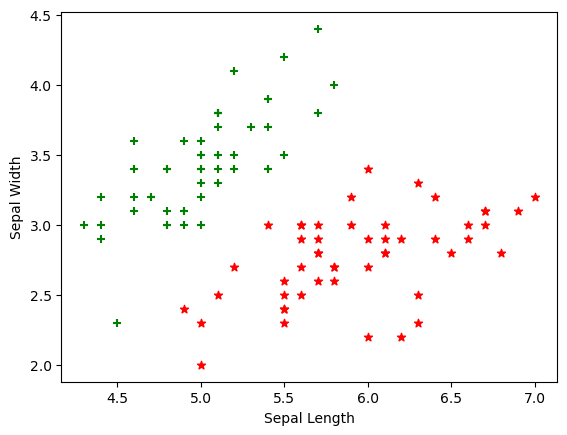

In [18]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color="green", marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color="red", marker='*')

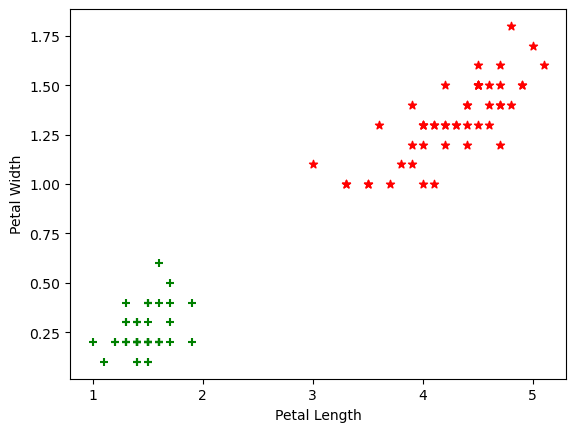

In [20]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color="green", marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color="red", marker='*')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop(['target','flower_name'], axis='columns')
Y=df.target

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2)

In [25]:
len(X_train)

120

In [26]:
len(X_test)

30

In [28]:
from sklearn.svm import SVC
model=SVC()

In [29]:
model.fit(X_train,Y_train)

SVC()

In [33]:
model.score(X_test,Y_test)

1.0

In [34]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\krish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

# Tune parameters

# 1. Regularization (C)

In [35]:
model_C = SVC(C=1)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

1.0

In [36]:
model_C = SVC(C=10)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

1.0

# 2. Gamma

In [39]:
model_g = SVC(gamma=10)
model_g.fit(X_train, Y_train)
model_g.score(X_test, Y_test)

0.9666666666666667

#  Kernel


In [40]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, Y_train)

SVC(kernel='linear')

In [42]:
model_linear_kernal.score(X_test, Y_test)

1.0